## 2. Probability Distributions

In [41]:
using PyPlot
using Formatting
using Random
using Distributions
using Printf

Random.seed!(1234);

### 2.1 Binary Variables

In [29]:
ber = Bernoulli(0.25)
x = rand(ber, 1000)

ber_fit = fit(Bernoulli, x)

Bernoulli{Float64}(p=0.246)

#### 2.1.1. The beta distributions

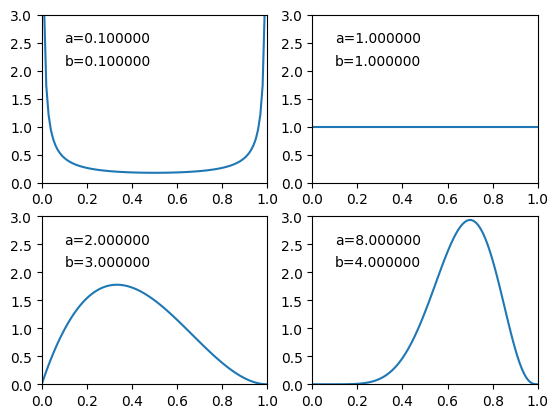

In [56]:
fig = figure()
x = range(0, stop=1, length=100)
for (i, (a, b)) in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]])
    fignum = 220+i
    subplot(fignum)
    beta = Beta(a, b)
    PyPlot.xlim(0, 1)
    PyPlot.ylim(0, 3)
    PyPlot.plot(x, pdf.(beta, x))
    PyPlot.annotate(format("a={:f}", a), (0.1, 2.5))
    PyPlot.annotate(format("b={:f}", b), (0.1, 2.1))
end
PyPlot.show()

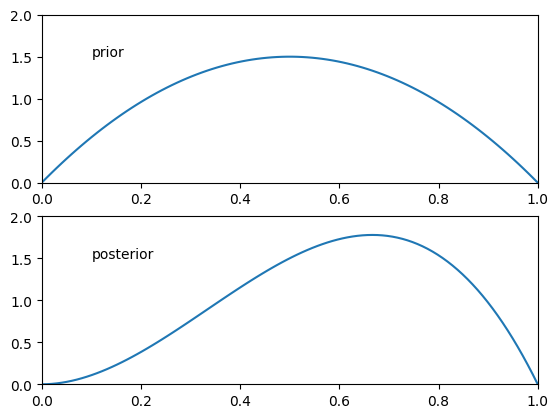

In [67]:
a = 2.0
b = 2.0
mu_prior = Beta(a, b)
xmu_prior = pdf.(mu_prior, x)

fig = figure()
PyPlot.subplot(211)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 2)
PyPlot.plot(x, xmu_prior)
PyPlot.annotate("prior", (0.1, 1.5))

function posterior_mu(X, a, b)
    
    N = length(X)
    a_ = a
    b_ = N + b
    for xn in X
        a_ = a_ + xn
        b_ = b_ - xn
    end
    
    mu = Beta(a_, b_)
    
    return mu
end

x_data = [1.0]
mu_posterior = posterior_mu(x_data, a, b)
xmu_posterior = pdf.(mu_posterior, x)
PyPlot.subplot(212)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 2)
PyPlot.plot(x, xmu_posterior)
PyPlot.annotate("posterior", (0.1, 1.5))

plt.show()

In [77]:
@printf "Maximum likelihood estimation \n"
bel_mle = fit_mle(Bernoulli, [1])
@printf "%d out of 10000 is 1 \n" sum(rand(bel_mle, 10000)) 

@printf "Bayesian estimation \n"
x_data = [1.0]
bel_bayese = posterior_mu(x_data, 1.0, 1.0)
@printf "%d out of 10000 is 1 \n" sum(rand(bel_bayese, 10000)) 

Maximum likelihood estimation 
10000 out of 10000 is 1 
Bayesian estimation 
6660 out of 10000 is 1 


## 2.2 Multinomial Variables

In [52]:
cat = Categorical([0.5, 0.25, 0.25])
x = rand(cat, 1000)

cat_fit = fit(Categorical, x)

DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},Array{Float64,1}}(support=Base.OneTo(3), p=[0.487, 0.251, 0.262])